In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training=train_data.flow_from_directory('/content/drive/MyDrive/face_train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 285 images belonging to 26 classes.


In [ ]:

training.class_indices

{'Chi': 0,
 'Dương': 1,
 'Hòa ': 2,
 'Huân': 3,
 'Huy': 4,
 'Lan Anh': 5,
 'Lợi': 6,
 'Nam': 7,
 'Ngọc ': 8,
 'Như': 9,
 'Nữ': 10,
 'Thắng': 11,
 'Thảo': 12,
 'Toàn': 13,
 'Trân': 14,
 'Trường ': 15,
 'Tuấn': 16,
 'face ảo': 17,
 'khánh': 18,
 'khôi': 19,
 'người lạ 1': 20,
 'người lạ 2': 21,
 'người lạ 3': 22,
 'Đăng': 23,
 'Đức ': 24,
 'đoàn': 25}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(26,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
9/9 [==============================] - 29s 3s/step - loss: 1.8166 - accuracy: 0.5228
Epoch 2/20
9/9 [==============================] - 25s 3s/step - loss: 0.9845 - accuracy: 0.6175
Epoch 3/20
9/9 [==============================] - 25s 3s/step - loss: 0.5386 - accuracy: 0.8316
Epoch 4/20
9/9 [==============================] - 23s 2s/step - loss: 0.2962 - accuracy: 0.8982
Epoch 5/20
9/9 [==============================] - 26s 3s/step - loss: 0.2164 - accuracy: 0.9404
Epoch 6/20
9/9 [==============================] - 25s 3s/step - loss: 0.1298 - accuracy: 0.9614
Epoch 7/20
9/9 [==============================] - 25s 3s/step - loss: 0.1489 - accuracy: 0.9439
Epoch 8/20
9/9 [==============================] - 23s 2s/step - loss: 0.1176 - accuracy: 0.9614
Epoch 9/20
9/9 [==============================] - 25s 3s/step - loss: 0.1284 - accuracy: 0.9614
Epoch 10/20
9/9 [==============================] - 25s 3s/step - loss: 0.1035 - accuracy: 0.9684
Epoch 11/20
9/9 [======================

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.02515980787575245
Train Accuracy 0.9894737005233765


In [ ]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/Face.h5")

In [ ]:
model_1=load_model('/content/drive/MyDrive/Data_AI/Face.h5')

1/1 [==============================] - 0s 46ms/step
Thanh


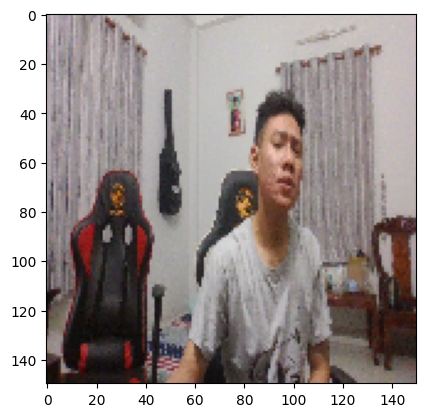

1/1 [==============================] - 0s 42ms/step
Thanh


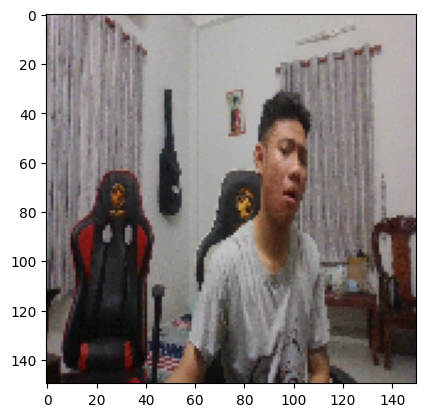

1/1 [==============================] - 0s 60ms/step
Thanh


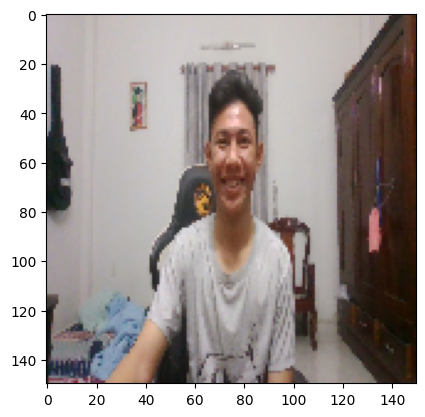

1/1 [==============================] - 0s 44ms/step
QPhuc


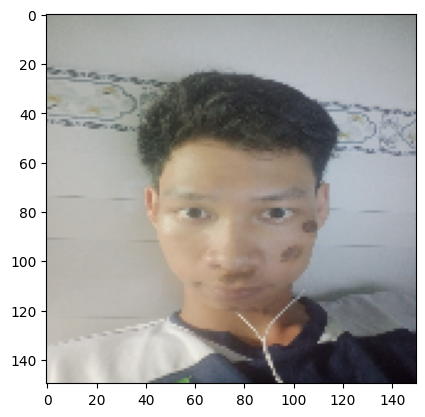

1/1 [==============================] - 0s 43ms/step
QPhuc


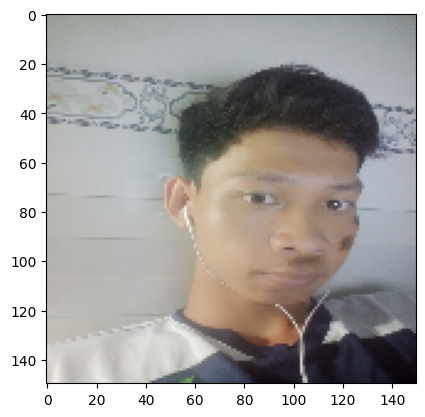

1/1 [==============================] - 0s 44ms/step
QPhuc


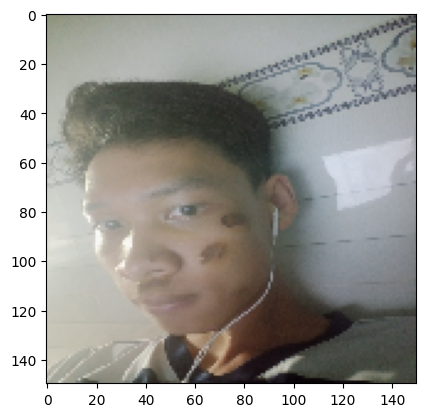

1/1 [==============================] - 0s 45ms/step
pqhuy


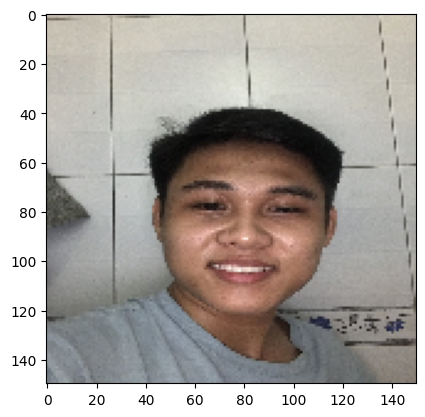

UnidentifiedImageError: ignored

In [ ]:
folder="/content/drive/MyDrive/face_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Chi','Dương','Đăng','Đoàn','Đức','face ảo','Hòa','Huân','Thanh','Qphuc','Pqhuy','Huy',
 'Lợi','Thảo','Sang','Thắng','TLoc','Nam','Tuấn','Toàn','Thao','Thinh','Ngọc','Như','Nữ','Lan AnhAnh']
  print(class_name[result])
  plt.show()